# Importando Bibliotecas

In [ ]:
import folium
from folium import plugins
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import ipywidgets as widgets

from matplotlib.gridspec import GridSpec
from ipywidgets import interactive, fixed
from folium.plugins import HeatMap

In [ ]:
dados = pd.read_csv('/content/Crimes_With_Dates_Cleaned.csv')

# Informações dos Dados

In [ ]:
dados.shape

(291130, 36)

In [ ]:
dados.sample()

Unnamed: 0  Incident ID Offence Code  CR Number  \
77611       77611    201215144         9021  180057834   

         Dispatch Date / Time NIBRS Code  Victims  Crime Name1 Crime Name2  \
77611  11/18/2018 07:24:21 AM        90Z        1  Not a Crime     Runaway   

              Crime Name3  ...           End_Date_Time   Latitude  Longitude  \
77611  JUVENILE - RUNAWAY  ...  11/18/2018 08:00:00 AM  39.193083 -77.276092   

      Police District Number             Location  Year Month Year-Month Day  \
77611                     5D  (39.1931, -77.2761)  2018    11    2018-11  18   

      Committed_At_Morning  
77611                 True  

[1 rows x 36 columns]

In [ ]:
dados.isna().sum()

Unnamed: 0                     0
Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       48839
NIBRS Code                     0
Victims                        0
Crime Name1                  231
Crime Name2                  231
Crime Name3                  231
Police District Name          93
Block Address              25096
City                        1168
State                          0
Zip Code                    3172
Agency                         0
Place                          0
Sector                      1528
Beat                        1528
PRA                          237
Address Number             25006
Street Prefix             278123
Street Name                    1
Street Suffix             285972
Street Type                  332
Start_Date_Time                1
End_Date_Time             153882
Latitude                       1
Longitude                      1
Police District Number         1
Location  

In [ ]:
dados.isna().sum()

Unnamed: 0                   0
Incident ID                  0
Offence Code                 0
CR Number                    0
Dispatch Date / Time         0
NIBRS Code                   0
Victims                      0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Police District Name         0
Block Address                0
City                      1168
State                        0
Zip Code                  3172
Agency                       0
Place                        0
Sector                       0
Beat                         0
PRA                        237
Address Number               0
Street Prefix                0
Street Name                  1
Street Suffix                0
Street Type                  0
Start_Date_Time              1
End_Date_Time                0
Latitude                     1
Longitude                    1
Police District Number       1
Location                     1
Year                         1
Month   

In [ ]:
dados.dtypes

Unnamed: 0                  int64
Incident ID                 int64
Offence Code               object
CR Number                   int64
Dispatch Date / Time       object
NIBRS Code                 object
Victims                     int64
Crime Name1                object
Crime Name2                object
Crime Name3                object
Police District Name       object
Block Address              object
City                       object
State                      object
Zip Code                  float64
Agency                     object
Place                      object
Sector                     object
Beat                       object
PRA                        object
Address Number             object
Street Prefix              object
Street Name                object
Street Suffix              object
Street Type                object
Start_Date_Time            object
End_Date_Time              object
Latitude                  float64
Longitude                 float64
Police Distric

In [ ]:
dados.duplicated().sum()

0

# Transformando os Dados

- Em relação aos dados ausentes de valores categóricos irei substituir por 'Indefinite', 'Undefined' e 'undefined location', já que há uma grande quantidade de dados faltantes no conjunto de dados. Agora, com os valores númericos, como não dá para definir um valor concreto, irei apenas excluir-los do conjunto.

In [ ]:
dados['End_Date_Time'] = dados['End_Date_Time'].fillna('Indefinite_Time')

dados['Dispatch Date / Time'] = dados['Dispatch Date / Time'].fillna('Indefinite_Time')

dados['Crime Name1'] = dados['Crime Name1'].fillna('Indefinite')
dados['Crime Name2'] = dados['Crime Name2'].fillna('Indefinite')
dados['Crime Name3'] = dados['Crime Name3'].fillna('Indefinite')

dados['Police District Name'] = dados['Police District Name'].fillna('undefined location')
dados['Block Address'] = dados['Block Address'].fillna('undefined location')
dados['Sector'] = dados['Sector'].fillna('Undefined')
dados['Beat'] = dados['Beat'].fillna('Undefined')
dados['Address Number'] = dados['Address Number'].fillna('undefined location')
dados['Street Suffix'] = dados['Street Suffix'].fillna('Undefined')
dados['Street Type'] = dados['Street Type'].fillna('Undefined')
dados['Street Prefix'] = dados['Street Prefix'].fillna('Undefined')

In [ ]:
# Transformando as datas para inteiro
dados['Year'] = dados['Year'].astype(int)
dados['Month'] = dados['Month'].astype(int)
dados['Day'] = dados['Day'].astype(int)

In [ ]:
dados.dropna(inplace=True)
dados.shape

(301432, 36)

# Gráficos

## Quais são os crimes mais efetuados?

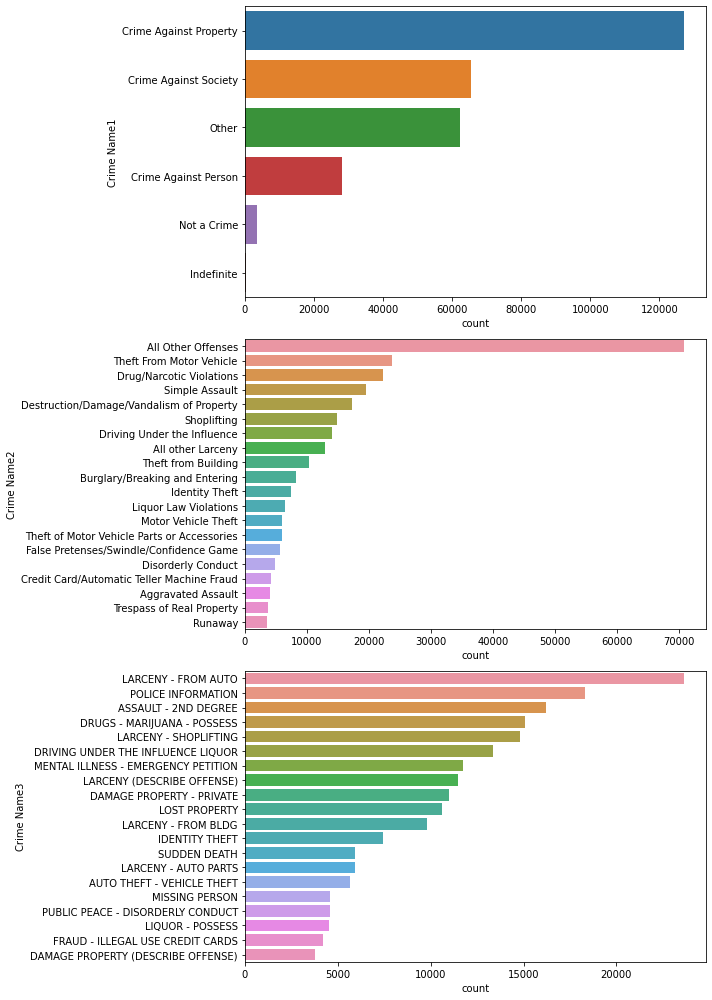

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(10,14))

sns.countplot(y=dados['Crime Name1'], order=dados['Crime Name1'].value_counts().index,ax=axes[0])
sns.countplot(y=dados['Crime Name2'], order=dados['Crime Name2'].value_counts().index[0:20],ax=axes[1])
sns.countplot(y=dados['Crime Name3'], order=dados['Crime Name3'].value_counts().index[0:20], ax=axes[2])

plt.tight_layout()
plt.show()

## Qual a cidade com maior índice de crime?

In [ ]:
dados['City'].value_counts().reset_index()

index    City
0        SILVER SPRING  104628
1         GAITHERSBURG   44037
2            ROCKVILLE   42030
3           GERMANTOWN   29729
4             BETHESDA   21035
5   MONTGOMERY VILLAGE    9374
6          TAKOMA PARK    8001
7          CHEVY CHASE    6317
8              POTOMAC    6275
9              DERWOOD    5446
10          KENSINGTON    4786
11               OLNEY    4628
12        BURTONSVILLE    3741
13          CLARKSBURG    3209
14            DAMASCUS    2515
15               BOYDS    1948
16         BROOKEVILLE     904
17         POOLESVILLE     876
18              ASHTON     416
19        SANDY SPRING     389
20           DICKERSON     289
21          CABIN JOHN     226
22        SPENCERVILLE     148
23           GLEN ECHO      91
24            BRINKLOW      72
25          MOUNT AIRY      71
26         BARNESVILLE      48
27              LAUREL      42
28         BEALLSVILLE      42
29             MT AIRY      20
30        GARRETT PARK      16
31          BELTSVILLE      13
32            HIGHLAND       9
33    WASHINGTON GROVE       8
34          WASHINGTON       7
35            WOODBINE       7
36             WHEATON       6
37              LANHAM       5
38             ADELPHI       4
39         HYATTSVILLE       3
40             BETHEDA       2
41          ROCKVILLLE       2
42           FREDERICK       1
43        COLLEGE PARK       1
44         TACOMA PARK       1
45          HAGERSTOWN       1
46               BOWIE       1
47           BRENTWOOD       1
48          CLAEKSBURG       1
49                   0       1
50        GAIHTERSBURG       1
51     CAPITOL HEIGHTS       1
52      NORTH BETHESDA       1
53       NORTH POTOMAC       1
54  FRIENDSHIP HEIGHTS       1
55         GAITHERSBUG       1
56           ROCKVIILE       1
57      SILVERS SPRING       1
58           GREENBELT       1

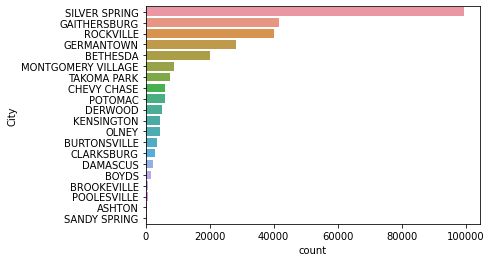

In [ ]:
sns.countplot(y=dados['City'], order=dados['City'].value_counts().index[0:20])

## Nome do Distrito Policial mais frequente?

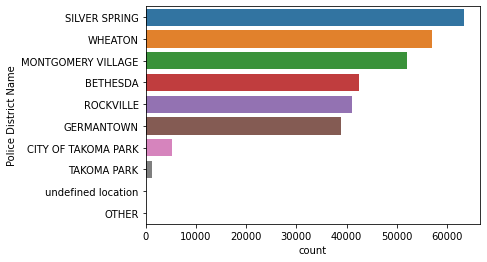

In [ ]:
sns.countplot(y=dados['Police District Name'], order=dados['Police District Name'].value_counts().index[0:20])

In [ ]:
dados['Police District Name'].value_counts()

SILVER SPRING          60346
WHEATON                54441
MONTGOMERY VILLAGE     49350
BETHESDA               40127
ROCKVILLE              39247
GERMANTOWN             36778
CITY OF TAKOMA PARK     4922
TAKOMA PARK             1280
undefined location        79
OTHER                     15
Name: Police District Name, dtype: int64

## Agência mais frequente?

In [ ]:
dados['Agency'].value_counts().reset_index()

index  Agency
0  MCPD  261590
1  RCPD   16264
2   GPD   16249
3  TPPD    6748
4  MCFM     552
5  MCSO      23
6  OTHR       4
7     P       2

## Qual o setor mais frequente nos dados?

In [ ]:
dados['Sector'].value_counts().reset_index()

index  Sector
0           P   29060
1           A   28954
2           G   26448
3           D   23600
4           R   22906
5           L   22565
6           I   22058
7           N   20533
8           K   20180
9           E   18791
10          M   18308
11          H   14968
12          J   14341
13          B   12108
14          T    5317
15  Undefined    1295

In [ ]:
dados['Street Prefix'].value_counts().reset_index()

index  Street Prefix
0  Undefined         287943
1          E           4895
2          N           4609
3          W           2520
4          S           1465

## Qual o local com mais crime?

In [ ]:
dados['Place'].value_counts().reset_index().head(30)

index  Place
0                  Street - In vehicle  32994
1            Residence - Single Family  32292
2          Residence - Apartment/Condo  29037
3                        Other/Unknown  24936
4                 Street - Residential  19797
5            Parking Lot - Residential  15468
6          Residence -Townhouse/Duplex  13867
7                 Residence - Driveway  10994
8             Parking Lot - Commercial  10614
9   Retail - Department/Discount Store   7751
10                 Street - Commercial   7331
11         School/College - DO NOT USE   6317
12                      Street - Other   5961
13                          Restaurant   5395
14                 Grocery/Supermarket   5142
15                       Retail - Mall   5137
16                   Residence - Other   4089
17                      Retail - Other   3821
18                    Residence - Yard   3319
19        Commercial - Office Building   3255
20                   Convenience Store   3212
21                 Government Building   3081
22                    Hotel/Motel/Etc.   2490
23        Parking Garage - Residential   2450
24                   Street - Bus Stop   2234
25      Hospital/Emergency Care Center   2096
26                         Gas Station   2064
27        Retail - Drug Store/Pharmacy   2058
28                   Retail - Clothing   1836
29                 Parking Lot - Other   1703

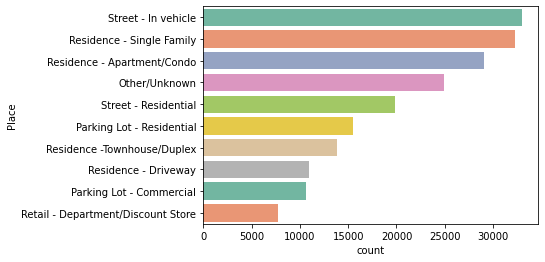

In [ ]:
sns.countplot(y=dados['Place'], order=dados['Place'].value_counts().index[0:10], palette='Set2')

## Quantos crimes ao longo dos anos?

In [ ]:
dados[['Year','Victims']].groupby('Year').sum().reset_index()

Year  Victims
0  2016    26623
1  2017    56079
2  2018    55227
3  2019    52309
4  2020    45659
5  2021    44610
6  2022    27807

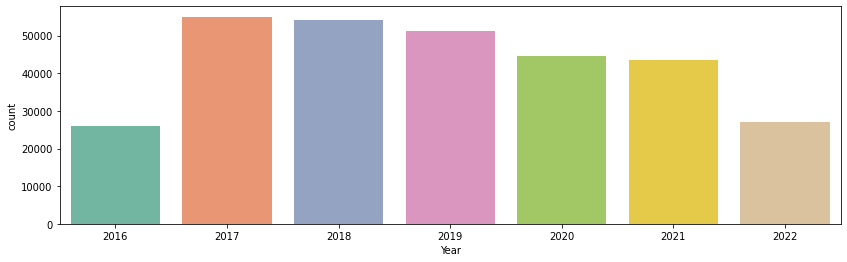

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x=dados['Year'],palette='Set2')

In [ ]:
vitimas = dados[['Victims','Year','Month','Day','City']].groupby(['Year','Month','Day','City']).sum().reset_index()

num = widgets.Dropdown(
    options= vitimas['Year'].unique().tolist(),
    value = 2017,
    description='ANO:',
    disabled=False,
)
def data_grafico(vitimas,num):
  vitimas = vitimas[vitimas['Year'] == num]
  fig = plt.figure(figsize=(14,6))
  gs = GridSpec(2,2)

  ax0 = fig.add_subplot(gs[1,0])
  ax1 = fig.add_subplot(gs[1,1])
  ax2 = fig.add_subplot(gs[0,:])

  sns.countplot(y=vitimas['City'],order=vitimas['City'].value_counts().index[0:10],ax=ax0,palette='Set2')
  sns.countplot(x=vitimas['Month'],ax=ax1,palette='Set2')
  sns.lineplot(x=vitimas['Day'],y=vitimas['Victims'],ax=ax2,palette='Set2', ci=None)

  plt.tight_layout()
  plt.show()

widgets.interactive(data_grafico, vitimas = fixed(vitimas), num = num)

interactive(children=(Dropdown(description='ANO:', index=1, options=(2016, 2017, 2018, 2019, 2020, 2021, 2022)…

## Quantos crimes teve por mês em cada cidade?

In [ ]:
cidade = dados[['City','Month','Year','Victims']].groupby(['City','Year','Month']).sum().reset_index()

In [ ]:
year = widgets.Dropdown(
    options= cidade['Year'].unique().tolist(),
    value = 2017,
    description='ANO:',
    disabled=False,
)

month = widgets.Dropdown(
    options= cidade['Month'].unique().tolist(),
    value = 8,
    description='MÊS:',
    disabled=False,
)

def tabela(cidade, year, month):
  cidade = cidade[(cidade['Year'] == year) & (cidade['Month'] == month)].copy()

  fig = go.Figure(data=[go.Table(header=dict(values=['Cidade', 'Year','Month', 'Vítimas']),
                  cells=dict(values=[cidade['City'], cidade['Year'], cidade['Month'],cidade['Victims']]))
                      ])
  return fig.show()

widgets.interactive(tabela, cidade = fixed(cidade), year=year, month=month)

interactive(children=(Dropdown(description='ANO:', index=2, options=(2022, 2016, 2017, 2018, 2019, 2020, 2021)…

### Quais crimes e quantas vítimas?

In [ ]:
print('OS 20 CRIMES MAIS FREQUENTES.')
dados[[ 'Victims', 'Crime Name1',
       'Crime Name2', 'Crime Name3']].groupby(['Crime Name1','Crime Name2', 'Crime Name3']).sum().reset_index().sort_values('Victims',ascending=False).head(20)

OS 20 CRIMES MAIS FREQUENTES.


Crime Name1                                  Crime Name2  \
159  Crime Against Property                     Theft From Motor Vehicle   
59     Crime Against Person                               Simple Assault   
326                   Other                           All Other Offenses   
263   Crime Against Society                     Drug/Narcotic Violations   
150  Crime Against Property                                  Shoplifting   
240   Crime Against Society                  Driving Under the Influence   
321                   Other                           All Other Offenses   
64   Crime Against Property                            All other Larceny   
99   Crime Against Property     Destruction/Damage/Vandalism of Property   
319                   Other                           All Other Offenses   
161  Crime Against Property                          Theft from Building   
122  Crime Against Property                               Identity Theft   
329                   Other                           All Other Offenses   
164  Crime Against Property  Theft of Motor Vehicle Parts or Accessories   
127  Crime Against Property                          Motor Vehicle Theft   
323                   Other                           All Other Offenses   
238   Crime Against Society                           Disorderly Conduct   
283   Crime Against Society                        Liquor Law Violations   
95   Crime Against Property   Credit Card/Automatic Teller Machine Fraud   
60     Crime Against Person                               Simple Assault   

                             Crime Name3  Victims  
159                  LARCENY - FROM AUTO    23624  
59                  ASSAULT - 2ND DEGREE    20212  
326                   POLICE INFORMATION    18553  
263          DRUGS - MARIJUANA - POSSESS    15079  
150                LARCENY - SHOPLIFTING    14805  
240   DRIVING UNDER THE INFLUENCE LIQUOR    13357  
321  MENTAL ILLNESS - EMERGENCY PETITION    11806  
64            LARCENY (DESCRIBE OFFENSE)    11474  
99             DAMAGE PROPERTY - PRIVATE    10969  
319                        LOST PROPERTY    10740  
161                  LARCENY - FROM BLDG     9813  
122                       IDENTITY THEFT     7430  
329                         SUDDEN DEATH     5934  
164                 LARCENY - AUTO PARTS     5927  
127           AUTO THEFT - VEHICLE THEFT     5650  
323                       MISSING PERSON     4618  
238    PUBLIC PEACE - DISORDERLY CONDUCT     4596  
283                     LIQUOR - POSSESS     4516  
95      FRAUD - ILLEGAL USE CREDIT CARDS     4212  
60                      ASSAULT - SIMPLE     4103

In [ ]:
crimes=dados[[ 'Year','Victims', 'Crime Name1','Crime Name2', 'Crime Name3']].groupby(['Year','Crime Name1','Crime Name2', 'Crime Name3']).sum().reset_index()

year = widgets.Dropdown(
    options= crimes['Year'].unique().tolist(),
    value = 2017,
    description='ANO:',
    disabled=False,
)

crime1 = widgets.Dropdown(
    options= crimes['Crime Name1'].unique().tolist(),
    value = 'Other',
    description='Crimes:',
    disabled=False,
)

def tabela(crimes, year, crime1):
  crimes = crimes[(crimes['Year'] == year) & (crimes['Crime Name1'] == crime1)].copy()

  fig = go.Figure(data=[go.Table(header=dict(values=['Year','Crime Name1','Crime Name2', 'Crime Name3','Victims']),
                  cells=dict(values=[crimes['Year'], crimes['Crime Name1'], crimes['Crime Name2'],crimes['Crime Name3'], crimes['Victims']]))
                      ])
  return fig.show()

widgets.interactive(tabela, crimes = fixed(crimes), year=year, crime1 = crime1)

interactive(children=(Dropdown(description='ANO:', index=1, options=(2016, 2017, 2018, 2019, 2020, 2021, 2022)…

In [ ]:
dados['Victims'].value_counts().reset_index()

index  Victims
0      1   281384
1      2     4399
2      3      536
3      4      176
4      5       54
5      6       16
6      7       14
7      8        3
8     12        2
9     22        1

In [ ]:
## Quem são as 22 vítimas?
dados[dados['Victims'] == 22].T

112793
Unnamed: 0                                   112793
Incident ID                               201090564
Offence Code                                   1313
CR Number                                  16037345
Dispatch Date / Time                Indefinite_Time
NIBRS Code                                      13B
Victims                                          22
Crime Name1                    Crime Against Person
Crime Name2                          Simple Assault
Crime Name3                        ASSAULT - SIMPLE
Police District Name                  SILVER SPRING
Block Address                 14000 BLK  CASTLE BLV
City                                  SILVER SPRING
State                                            MD
Zip Code                                    20904.0
Agency                                         MCPD
Place                   Residence - Apartment/Condo
Sector                                            I
Beat                                            3I2
PRA                                           380.0
Address Number                              14000.0
Street Prefix                             Undefined
Street Name                                  CASTLE
Street Suffix                             Undefined
Street Type                                     BLV
Start_Date_Time              07/23/2016 04:30:00 PM
End_Date_Time                07/23/2016 04:41:00 PM
Latitude                                   39.08461
Longitude                                -76.940557
Police District Number                           3D
Location                        (39.0846, -76.9406)
Year                                         2016.0
Month                                           7.0
Year-Month                                  2016-07
Day                                            23.0
Committed_At_Morning                          False

# Mapa 

In [ ]:
mapa = folium.Map(location=[39.177744,-77.265619], zoom_start=10)

locais = dados[['Latitude','Longitude']].values.tolist()

HeatMap(locais, radius=20).add_to(mapa)
#mapa.save('mapa.html')
mapa